In [2]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.8 MB/s eta 0:00:00


# **From Video**

In [2]:
import cv2
from mtcnn import MTCNN

def detect_faces_in_video_realtime(video_path, output_path='output_video.avi'):
    # Load pre-trained MTCNN model
    mtcnn = MTCNN()

    # Open video capture
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Create VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()

        if not ret:
            # If the video has reached its end, break out of the loop
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces using MTCNN
        faces = mtcnn.detect_faces(frame_rgb)

        # Draw rectangles around the faces
        for face in faces:
            x, y, w, h = face['box']
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Write the frame to the output video file
        out.write(frame)

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage:
detect_faces_in_video_realtime('/content/demo3.mp4', output_path='/content/output_demo3.avi')


3/3 [==============================] - 0s 29ms/step


# **From Image**

In [ ]:
from google.colab.patches import cv2_imshow
import time
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 173ms/step


3/3 [==============================] - 0s 28ms/step


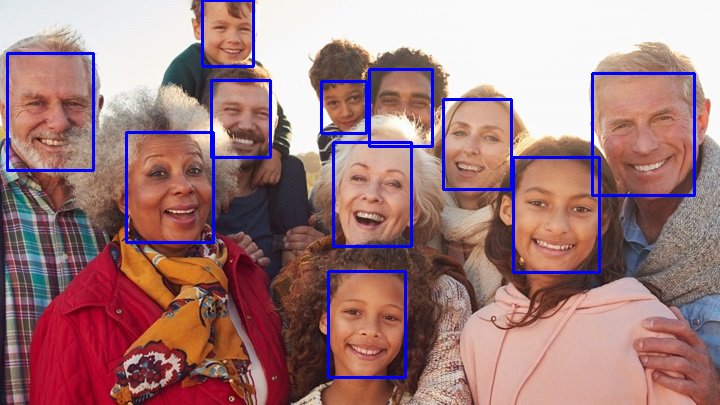

Time taken to process: 2.1470 seconds


11

In [ ]:
def detect_faces_in_image(image_path):
    # Load pre-trained MTCNN model
    mtcnn = MTCNN()

    # Read an image
    img = cv2.imread(image_path)

    # Convert the image to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Measure the start time
    start_time = time.time()

    # Detect faces using MTCNN
    faces = mtcnn.detect_faces(img_rgb)

    # Measure the end time
    end_time = time.time()

    # Draw rectangles around the faces
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Count the number of faces
    num_faces = len(faces)

    # Calculate and print the processing time
    processing_time = end_time - start_time
    print(f'Time taken to process: {processing_time:.4f} seconds')

    return num_faces

    # Count the number of faces
    num_faces = len(faces)


    # Display the result
    cv2_imshow(img)
    plt.axis('off')
    plt.title(f'Number of Faces: {num_faces}')
    plt.show()

# Example usage:
detect_faces_in_image('/content/OYH_mind-blowing-facts.jpg')